# Tarea - Caminata aleatoria

### Luis Edgardo Ordoñez Álvarez  expdt.751856   16/10/2024

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminata aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D.

In [2]:
x = [0]*10000
len(x)

10000

In [3]:
x[6]

0

In [4]:
x = [0]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

Tiempo = 10
TiempoD = 0.001
Muestras = int(Tiempo/TiempoD)
Muestras

10000

In [6]:
# Definimos las variables x, y, z dandoles un valor de lista
x = [0]*Muestras
y = [0]*Muestras
z = [0]*Muestras


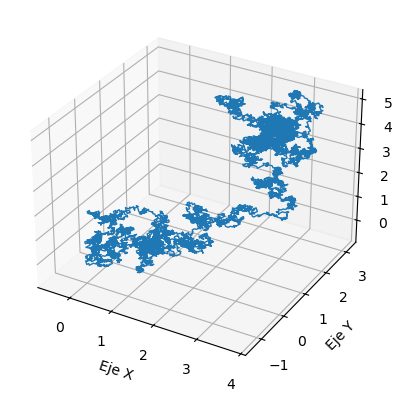

In [7]:
# Al ser un movimiento browiano toma valores al azar y como el problema lo indica, toma valores de -1 a 1

for i in range(1, Muestras) :
    Xi = np.random.choice([-1, 1])
    Yi = np.random.choice([-1, 1])
    Zi = np.random.choice([-1, 1])

    x[i] = x[i - 1] + Xi * np.sqrt(TiempoD)
    y[i] = y[i - 1] + Yi * np.sqrt(TiempoD)
    z[i] = z[i - 1] + Zi * np.sqrt(TiempoD)

# Grafica

Grafica = plt.figure()
Tres = Grafica.add_subplot(111, projection="3d")
Tres.plot(x, y, z, lw = 1)

Tres.set_xlabel("Eje X")
Tres.set_ylabel("Eje Y")
Tres.set_zlabel("Eje Z")

plt.show()

In [8]:
len(x)

10000

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

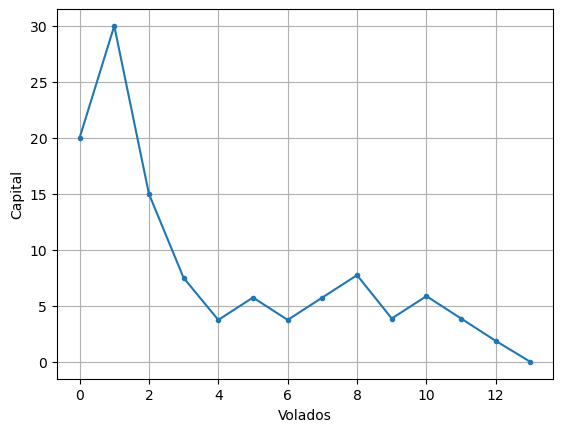

In [75]:
# 1.
# Realizamos la funcion para definir el valor en la que el capital llega a la quiebra

def quiebra(Capital_i = 20):
    Capital = Capital_i
    Historial = [Capital]
    Volados = 0

    # Aplicamos las condiciones que nos marca el problema con Ai
    while Capital > 0:
        Apuesta = Capital / 2 if Capital >= 6 else 2
        Resultado = np.random.choice([-1, 1])
        Capital = Capital + (Resultado * Apuesta) # Contador 1
        # Incluimos valores a lista
        Historial.append(max(Capital, 0))
        Volados = Volados + 1 # Contador 2
        
    return Historial, Volados

# Graficamos la evolución del capital hasta quedar en cero

Historial, Volados = quiebra()

plt.figure()
plt.plot(Historial, marker=".")
plt.xlabel("Volados")
plt.ylabel("Capital")
plt.grid()
plt.show()

In [78]:
# 2.

# Jugadores promedio en quiebra

Jugadores = 10000
Resultados = [] # En lista

for P in range(Jugadores):
    P, Volados = quiebra()
    Resultados.append(Volados)

# Calcular el promedio de volados
Promedio = np.mean(Resultados)

Promedio


26.2857

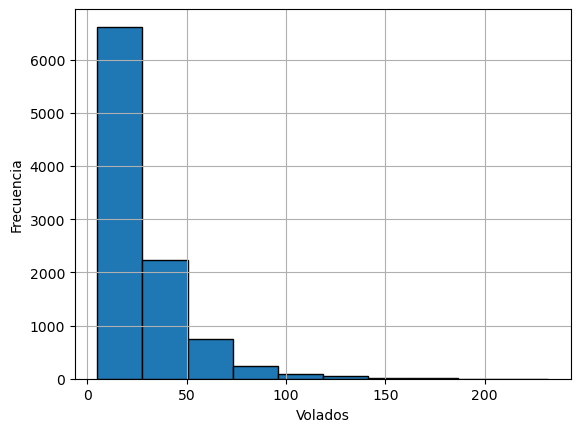

In [90]:
# 3.
plt.figure()
plt.hist(Resultados, edgecolor="black")
plt.xlabel("Volados")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()
